In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
soccer_df = pd.read_csv('../data/eda_all.csv')
soccer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588 entries, 0 to 4587
Data columns (total 45 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player Id      4588 non-null   int64  
 1   Name           4588 non-null   object 
 2   Birth Year     4588 non-null   int64  
 3   Age            4588 non-null   int64  
 4   Team           4588 non-null   object 
 5   Position       4588 non-null   object 
 6   year           4588 non-null   int64  
 7   Weekly Salary  4588 non-null   float64
 8   Base Salary    4588 non-null   float64
 9   ADJ Salary     4588 non-null   float64
 10  Apps           4588 non-null   float64
 11  Min            4588 non-null   float64
 12  G              4588 non-null   float64
 13  NPG            4588 non-null   float64
 14  A              4588 non-null   float64
 15  xG             4588 non-null   float64
 16  NPxG           4588 non-null   float64
 17  xA             4588 non-null   float64
 18  xGChain 

In [82]:
soccer_df.columns

Index(['Player Id', 'Name', 'Birth Year', 'Age', 'Team', 'Position', 'year',
       'Weekly Salary', 'Base Salary', 'ADJ Salary', 'Apps', 'Min', 'G', 'NPG',
       'A', 'xG', 'NPxG', 'xA', 'xGChain', 'xGBuildup', 'xG90', 'NPxG90',
       'xA90', 'xG90+xA90', 'NPxG90+xA90', 'xGChain90', 'xGBuildup90', 'SpG',
       'KeyP', 'Drb_Off', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating',
       'Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 'Drb_Def', 'Blocks',
       'AvgP', 'PS%', 'Age Lev'],
      dtype='object')

In [83]:
drop_columns = ['Player Id', 'Name', 'Birth Year', 'Team', 'year', 'Weekly Salary', 'Base Salary', 'Age Lev', 'NPG', 'xG', 'NPxG', 'xA',
                # 'G', 'A',
                'xG90', 'xA90',
                'NPxG90', 'xG90+xA90', 'NPxG90+xA90', 'xGChain90', 'xGBuildup90', 'ADJ Salary', 'Rating']
soccer_df = soccer_df.drop(columns=drop_columns)
soccer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4588 entries, 0 to 4587
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        4588 non-null   int64  
 1   Position   4588 non-null   object 
 2   Apps       4588 non-null   float64
 3   Min        4588 non-null   float64
 4   G          4588 non-null   float64
 5   A          4588 non-null   float64
 6   xGChain    4588 non-null   float64
 7   xGBuildup  4588 non-null   float64
 8   SpG        4588 non-null   float64
 9   KeyP       4588 non-null   float64
 10  Drb_Off    4588 non-null   float64
 11  Fouled     4588 non-null   float64
 12  Off        4588 non-null   float64
 13  Disp       4588 non-null   float64
 14  UnsTch     4588 non-null   float64
 15  Tackles    4588 non-null   float64
 16  Inter      4588 non-null   float64
 17  Fouls      4588 non-null   float64
 18  Offsides   4588 non-null   float64
 19  Clear      4588 non-null   float64
 20  Drb_Def 

In [84]:
soccer_df.describe()

,Age,Apps,Min,G,A,xGChain,xGBuildup,SpG,KeyP,Drb_Off,...,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb_Def,Blocks,AvgP,PS%
count,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,...,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000
mean,25.914560,20.581953,1466.584350,1.964255,1.389494,5.532452,3.305473,0.756791,0.558421,0.581529,...,0.871374,1.124752,0.780236,0.698120,0.125679,1.531114,0.607180,0.223566,29.003466,76.909555
std,4.205339,11.491688,1032.205164,3.519175,2.191754,5.689910,3.420017,0.711380,0.535927,0.609925,...,0.705471,0.839077,0.703740,0.463213,0.229381,1.754969,0.481147,0.294067,16.436788,12.415437
min,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,11.000000,532.500000,0.000000,0.000000,1.280000,0.720000,0.250000,0.151515,0.137931,...,0.320000,0.500000,0.184211,0.379077,0.000000,0.333333,0.250000,0.000000,17.000000,72.727273
50%,26.000000,22.000000,1390.000000,1.000000,1.000000,3.740000,2.345000,0.571429,0.437500,0.421053,...,0.750000,1.000000,0.646110,0.676471,0.000000,0.864865,0.533333,0.108108,27.285714,79.316827
75%,29.000000,31.000000,2326.250000,2.000000,2.000000,7.982500,4.772500,1.068966,0.823529,0.833333,...,1.263158,1.629630,1.200000,1.000000,0.153846,2.088904,0.875000,0.333333,38.439236,84.322658
max,41.000000,38.000000,3420.000000,36.000000,20.000000,37.800000,23.960000,4.972973,4.171429,5.037037,...,4.060606,7.000000,4.216216,4.000000,2.000000,11.500000,4.000000,2.052632,90.411765,100.000000


<Axes: ylabel='Min'>

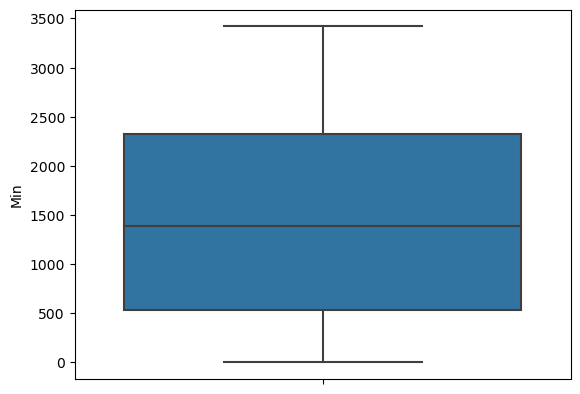

In [85]:
sns.boxplot(data=soccer_df,y='Min')

In [86]:
min_3 = soccer_df['Min'].quantile(q=0.3, interpolation='nearest')
print(f'원본 개수 : {len(soccer_df)}')
soccer_df = soccer_df[soccer_df['Min'] > min_3]
print(f'min > {min_3} 개수 : {len(soccer_df)}')

원본 개수 : 4588
min > 703.0 개수 : 3210


In [87]:
drop_columns = ['Min', 'Apps']
soccer_df = soccer_df.drop(columns=drop_columns)
soccer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3210 entries, 0 to 4539
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        3210 non-null   int64  
 1   Position   3210 non-null   object 
 2   G          3210 non-null   float64
 3   A          3210 non-null   float64
 4   xGChain    3210 non-null   float64
 5   xGBuildup  3210 non-null   float64
 6   SpG        3210 non-null   float64
 7   KeyP       3210 non-null   float64
 8   Drb_Off    3210 non-null   float64
 9   Fouled     3210 non-null   float64
 10  Off        3210 non-null   float64
 11  Disp       3210 non-null   float64
 12  UnsTch     3210 non-null   float64
 13  Tackles    3210 non-null   float64
 14  Inter      3210 non-null   float64
 15  Fouls      3210 non-null   float64
 16  Offsides   3210 non-null   float64
 17  Clear      3210 non-null   float64
 18  Drb_Def    3210 non-null   float64
 19  Blocks     3210 non-null   float64
 20  AvgP       32

In [88]:
soccer_df = soccer_df[soccer_df['Position']!='Goalkeeper']
soccer_df['Position'].value_counts()

Position
Defender      1174
Midfielder    1130
Forward        670
Name: count, dtype: int64

In [89]:
# 0 : 수비수, 1 : 공격수, 2 : 미드필더
soccer_df['Position'], _ = pd.factorize(soccer_df['Position'], sort=True)
soccer_df['Position'].value_counts()

Position
0    1174
2    1130
1     670
Name: count, dtype: int64

In [90]:
X = soccer_df.drop(columns='Position')
y = soccer_df['Position']
print(soccer_df.shape, X.shape, y.shape)

(2974, 22) (2974, 21) (2974,)


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn import tree

In [92]:
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=1216)
print(f'train data : {len(train_idx)}')
print(f'valid data : {len(valid_idx)}')
t_c, v_c = Counter(y.iloc[train_idx]), Counter(y.iloc[valid_idx])
print(f'train data y : {Counter(y.iloc[train_idx])}')
print(f'train data y : {Counter(y.iloc[valid_idx])}')
print(f"valid/train, 수비수 : {v_c.get(0)/t_c.get(0):.2f}, 공격수 : {v_c.get(1)/t_c.get(1):.2f}, 미드필더 : {v_c.get(2)/t_c.get(2):.2f}")

train data : 2081
valid data : 893
train data y : Counter({0: 808, 2: 807, 1: 466})
train data y : Counter({0: 366, 2: 323, 1: 204})
valid/train, 수비수 : 0.45, 공격수 : 0.44, 미드필더 : 0.40


In [93]:
estimators = [50, 60, 70, 80, 90, 100, 110,] # tree의 개수
depth = [2, 3, 4, 5, 6, 7, 8, 9, 10]

In [94]:
save_est = []
save_dep = []
save_t_f1 = []
save_v_f1 = []

In [95]:
cnt = 0
for est in estimators:
    for dep in depth:
        print(f'>>> {cnt} <<<')
        cnt += 1
        print(f'number of estimators : {est}, max depth : {dep}')
        model = RandomForestClassifier(
            n_estimators=est,
            max_depth=dep,
            random_state=1216,
            criterion= 'gini', # 'entropy',
            max_features='sqrt',
            bootstrap=True,
            oob_score=True
        )
        model.fit(X.iloc[train_idx], y.iloc[train_idx])

        # train ACC
        y_pred_train = model.predict(X.iloc[train_idx])
        cm_train = confusion_matrix(y.iloc[train_idx], y_pred_train)
        print('train Confusion Matrix')
        print(cm_train)
        print(f'train acc : {(cm_train[0,0]+cm_train[1,1]+cm_train[2,2]) / cm_train.sum()}')
        average_option = 'micro' # {'micro', 'macro', 'samples', 'weighted', 'binary'} or None
        t_f1_score = f1_score(y.iloc[train_idx], y_pred_train, average=average_option)
        print(f"train F1-Score : {t_f1_score}")
        # valid ACC
        y_pred_test = model.predict(X.iloc[valid_idx])
        cm_test = confusion_matrix(y.iloc[valid_idx], y_pred_test)
        print('valid Confusion Matrix')
        print(cm_test)
        print(f'test acc : {(cm_test[0,0]+cm_test[1,1]+cm_test[2,2]) / cm_test.sum()}')
        v_f1_score = f1_score(y.iloc[valid_idx], y_pred_test, average=average_option)
        print(f"test F1-Score : {v_f1_score}")
        print('-'*10)
        save_t_f1.append(t_f1_score)
        save_v_f1.append(v_f1_score)
        save_dep.append(dep)
        save_est.append(est)

>>> 0 <<<
number of estimators : 50, max depth : 2
train Confusion Matrix
[[731   1  76]
 [  0 351 115]
 [ 39  53 715]]
train acc : 0.8635271504084575
train F1-Score : 0.8635271504084575
valid Confusion Matrix
[[329   0  37]
 [  0 157  47]
 [ 20  19 284]]
test acc : 0.8622620380739082
test F1-Score : 0.8622620380739082
----------
>>> 1 <<<
number of estimators : 50, max depth : 3
train Confusion Matrix
[[734   0  74]
 [  0 363 103]
 [ 33  51 723]]
train acc : 0.8745795290725613
train F1-Score : 0.8745795290725613
valid Confusion Matrix
[[333   0  33]
 [  0 172  32]
 [ 23  21 279]]
test acc : 0.8779395296752519
test F1-Score : 0.8779395296752519
----------
>>> 2 <<<
number of estimators : 50, max depth : 4
train Confusion Matrix
[[746   0  62]
 [  0 383  83]
 [ 25  55 727]]
train acc : 0.8918789043728976
train F1-Score : 0.8918789043728976
valid Confusion Matrix
[[337   0  29]
 [  0 175  29]
 [ 21  19 283]]
test acc : 0.8902575587905935
test F1-Score : 0.8902575587905935
----------
>>> 

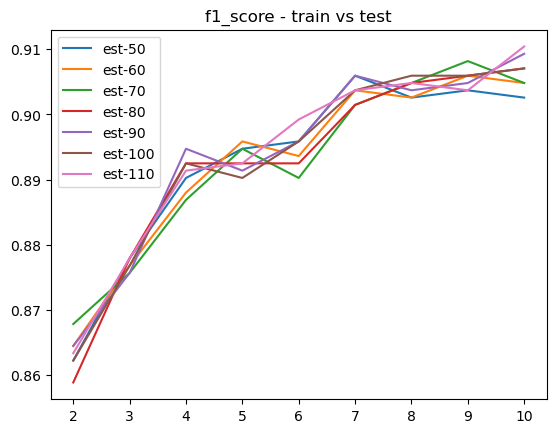

In [96]:
plt.title(f"f1_score - train vs test")
for i in range(len(estimators)):
    plt.plot(range(depth[0], len(depth) + depth[0]), save_v_f1[len(depth)*i:len(depth)*(i+1)], label=f'est-{estimators[i]}')
plt.legend()
plt.show()

In [97]:
# Best Model
best_model = RandomForestClassifier(
    n_estimators=save_est[np.argmax(save_v_f1)],
    max_depth=save_dep[np.argmax(save_v_f1)],
    random_state=1216,
    criterion='gini',
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
)
best_model.fit(X.iloc[train_idx], y.iloc[train_idx])

RandomForestClassifier(max_depth=10, n_estimators=110, oob_score=True,
                       random_state=1216)

In [98]:
# train
y_pred_train = model.predict(X.iloc[train_idx])
cm_train = confusion_matrix(y.iloc[train_idx], y_pred_train)
print('train Confusion Matrix')
print(cm_train)
print(f'train acc : {(cm_train[0,0]+cm_train[1,1]+cm_train[2,2]) / cm_train.sum()}')
print(f'train F1-Score : {f1_score(y.iloc[train_idx], y_pred_train, average=average_option)}')

train Confusion Matrix
[[796   0  12]
 [  0 455  11]
 [  1   4 802]]
train acc : 0.9865449303219606
train F1-Score : 0.9865449303219606


In [99]:
# valid
y_pred_test = model.predict(X.iloc[valid_idx])
cm_test = confusion_matrix(y.iloc[valid_idx], y_pred_test)
print('valid Confusion Matrix')
print(cm_test)
print(f'test acc : {(cm_test[0,0]+cm_test[1,1]+cm_test[2,2]) / cm_test.sum()}')
print(f'test F1-Score : {f1_score(y.iloc[valid_idx], y_pred_test, average=average_option)}')

valid Confusion Matrix
[[344   0  22]
 [  0 180  24]
 [ 17  17 289]]
test acc : 0.910414333706607
test F1-Score : 0.910414333706607


In [100]:
feature_map = pd.DataFrame(sorted(zip(best_model.feature_importances_, X.columns), reverse=True), columns=['Score', 'Feature'])
print(feature_map)

       Score    Feature
0   0.208325   Offsides
1   0.137258      Clear
2   0.092017        Off
3   0.062520        SpG
4   0.057942      Inter
5   0.057364       Disp
6   0.053115     Blocks
7   0.051121       AvgP
8   0.043105     UnsTch
9   0.042775    Drb_Def
10  0.036861    Tackles
11  0.025196        PS%
12  0.023017          G
13  0.019601       KeyP
14  0.017957      Fouls
15  0.014525     Fouled
16  0.013971    Drb_Off
17  0.013873  xGBuildup
18  0.013535    xGChain
19  0.010282        Age
20  0.005638          A


In [101]:
# (공격수와 미들필더), (수비수와 골키퍼)
# 0 : 수비수, 1 : 공격수, 2 : 미드필더 -> 0 : 수비, 1 : 공격
soccer_df['Position'] = soccer_df['Position'].apply(lambda p: 0 if p==0 else 1)
soccer_df['Position'].value_counts()

Position
1    1800
0    1174
Name: count, dtype: int64

In [102]:
X = soccer_df.drop(columns='Position')
y = soccer_df['Position']
print(soccer_df.shape, X.shape, y.shape)

(2974, 22) (2974, 21) (2974,)


In [103]:
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=1216)
print(f'train data : {len(train_idx)} valid data : {len(valid_idx)}')
t_c, v_c = Counter(y.iloc[train_idx]), Counter(y.iloc[valid_idx])
print(f'train data y : {Counter(y.iloc[train_idx])}, train data y : {Counter(y.iloc[valid_idx])}')
print(f"train 공격/수비 비율 : {t_c.get(0)/t_c.get(1):.2f}, test 공격/수비 비율 : {v_c.get(0)/v_c.get(1):.2f}")

train data : 2081 valid data : 893
train data y : Counter({1: 1273, 0: 808}), train data y : Counter({1: 527, 0: 366})
train 공격/수비 비율 : 0.63, test 공격/수비 비율 : 0.69


In [104]:
save_est = []
save_dep = []
save_t_f1 = []
save_v_f1 = []

In [105]:
cnt = 0
for est in estimators:
    for dep in depth:
        print(f'>>> {cnt} <<<')
        cnt += 1
        print(f'number of estimators : {est}, max depth : {dep}')
        model = RandomForestClassifier(
            n_estimators=est,
            max_depth=dep,
            random_state=1216,
            criterion= 'gini', # 'entropy',
            max_features='sqrt',
            bootstrap=True,
            oob_score=True
        )
        model.fit(X.iloc[train_idx], y.iloc[train_idx])

        # train ACC
        y_pred_train = model.predict(X.iloc[train_idx])
        cm_train = confusion_matrix(y.iloc[train_idx], y_pred_train)
        print('train Confusion Matrix')
        print(cm_train)
        print(f'train acc : {(cm_train[0,0]+cm_train[1,1]) / cm_train.sum()}')
        average_option = 'binary' # {'micro', 'macro', 'samples', 'weighted', 'binary'} or None
        t_f1_score = f1_score(y.iloc[train_idx], y_pred_train, average=average_option)
        print(f"train F1-Score : {t_f1_score}")
        # valid ACC
        y_pred_test = model.predict(X.iloc[valid_idx])
        cm_test = confusion_matrix(y.iloc[valid_idx], y_pred_test)
        print('valid Confusion Matrix')
        print(cm_test)
        print(f'test acc : {(cm_test[0,0]+cm_test[1,1]) / cm_test.sum()}')
        v_f1_score = f1_score(y.iloc[valid_idx], y_pred_test, average=average_option)
        print(f"test F1-Score : {v_f1_score}")
        print('-'*10)
        save_t_f1.append(t_f1_score)
        save_v_f1.append(v_f1_score)
        save_dep.append(dep)
        save_est.append(est)

>>> 0 <<<
number of estimators : 50, max depth : 2
train Confusion Matrix
[[ 724   84]
 [  26 1247]]
train acc : 0.9471407976934166
train F1-Score : 0.9577572964669739
valid Confusion Matrix
[[325  41]
 [ 17 510]]
test acc : 0.93505039193729
test F1-Score : 0.9461966604823747
----------
>>> 1 <<<
number of estimators : 50, max depth : 3
train Confusion Matrix
[[ 744   64]
 [  36 1237]]
train acc : 0.9519461797212878
train F1-Score : 0.9611499611499612
valid Confusion Matrix
[[337  29]
 [ 25 502]]
test acc : 0.9395296752519597
test F1-Score : 0.9489603024574669
----------
>>> 2 <<<
number of estimators : 50, max depth : 4
train Confusion Matrix
[[ 751   57]
 [  24 1249]]
train acc : 0.9610764055742431
train F1-Score : 0.9685924777045366
valid Confusion Matrix
[[340  26]
 [ 23 504]]
test acc : 0.9451287793952967
test F1-Score : 0.9536423841059603
----------
>>> 3 <<<
number of estimators : 50, max depth : 5
train Confusion Matrix
[[ 760   48]
 [  22 1251]]
train acc : 0.9663623258049014


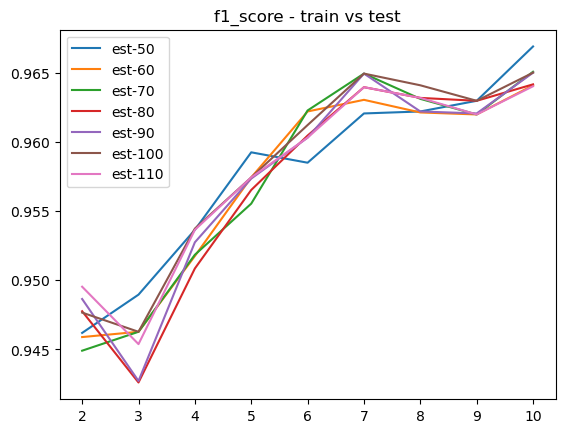

In [106]:
plt.title(f"f1_score - train vs test")
for i in range(len(estimators)):
    # plt.plot(range(depth[0], len(depth) + depth[0]), np.subtract(save_t_f1[len(depth)*i:len(depth)*(i+1)], save_v_f1[len(depth)*i:len(depth)*(i+1)]), label=f'est-{estimators[i]}')
    plt.plot(range(depth[0], len(depth) + depth[0]), save_v_f1[len(depth)*i:len(depth)*(i+1)], label=f'est-{estimators[i]}')
plt.legend()
plt.show()

In [107]:
# Best Model
best_model = RandomForestClassifier(
    n_estimators=save_est[np.argmax(save_v_f1)],
    max_depth=save_dep[np.argmax(save_v_f1)],
    random_state=1216,
    criterion='gini',
    max_features='sqrt',
    bootstrap=True,
    oob_score=True,
)
best_model.fit(X.iloc[train_idx], y.iloc[train_idx])

RandomForestClassifier(max_depth=10, n_estimators=50, oob_score=True,
                       random_state=1216)

In [108]:
# train
y_pred_train = model.predict(X.iloc[train_idx])
cm_train = confusion_matrix(y.iloc[train_idx], y_pred_train)
print('train Confusion Matrix')
print(cm_train)
print(f'train acc : {(cm_train[0,0]+cm_train[1,1]) / cm_train.sum()}')
print(f'train F1-Score : {f1_score(y.iloc[train_idx], y_pred_train, average=average_option)}')

train Confusion Matrix
[[ 808    0]
 [   4 1269]]
train acc : 0.9980778471888515
train F1-Score : 0.9984264358772621


In [109]:
# valid
y_pred_test = model.predict(X.iloc[valid_idx])
cm_test = confusion_matrix(y.iloc[valid_idx], y_pred_test)
print('valid Confusion Matrix')
print(cm_test)
print(f'test acc : {(cm_test[0,0]+cm_test[1,1]) / cm_test.sum()}')
print(f'test F1-Score : {f1_score(y.iloc[valid_idx], y_pred_test, average=average_option)}')

valid Confusion Matrix
[[346  20]
 [ 18 509]]
test acc : 0.9574468085106383
test F1-Score : 0.9640151515151514


In [110]:
feature_map = pd.DataFrame(sorted(zip(best_model.feature_importances_, X.columns), reverse=True), columns=['Score', 'Feature'])
print(feature_map)

       Score    Feature
0   0.318112   Offsides
1   0.196090      Clear
2   0.101886       Disp
3   0.077371        SpG
4   0.053415     Blocks
5   0.045864      Inter
6   0.033603     UnsTch
7   0.028576    Drb_Def
8   0.021970       AvgP
9   0.016555      Fouls
10  0.014670       KeyP
11  0.013547     Fouled
12  0.013503        PS%
13  0.011868    Tackles
14  0.010054    xGChain
15  0.009098          G
16  0.009077        Off
17  0.008067    Drb_Off
18  0.007712  xGBuildup
19  0.006028        Age
20  0.002931          A
